In [1]:
from __future__ import division, print_function
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/")
images, labels = mnist.train.images, mnist.train.labels
images = images.reshape((55000,28,28))
np.savez_compressed("data/MNIST_data/train", images=images, labels=labels)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [4]:
data = np.load("data/MNIST_data/train.npz")
images=data['images']
labels=data['labels']
n=len(images)
images.shape

(55000, 28, 28)

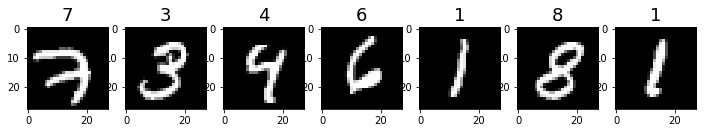

In [7]:
plots(images[:7], titles=labels[:7])

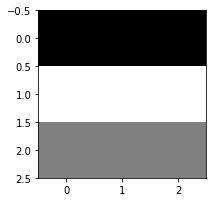

In [8]:
### filter example

top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [22]:
### convolution stride illustration

r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w=interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

interactive(children=(IntSlider(value=0, description='x1', max=28), IntSlider(value=28, description='x2', max=28), IntSlider(value=0, description='y1', max=28), IntSlider(value=28, description='y2', max=28), Output()), _dom_classes=('widget-interact',))

In [23]:
### convolution stride illustration

r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w=interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

interactive(children=(IntSlider(value=0, description='x1', max=28), IntSlider(value=28, description='x2', max=28), IntSlider(value=0, description='y1', max=28), IntSlider(value=28, description='y2', max=28), Output()), _dom_classes=('widget-interact',))

In [24]:
### images[0] as a grey-scale matrix

k=w.kwargs
dims = np.index_exp[k['y1']:k['y2']:1,k['x1']:k['x2']]
images[0][dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.3804,  0.3765,  0.302 ,  0.4627,  0.2392,  0.    ,  0.    ,
         0.    ],
       [ 0.9216,  0.9216,  0.9216,  0.9843,  0.9843,  0.9725,  0.9961,  0.9608,  0.9216,  0.7451,
         0.0824],
       [ 0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,
         0.7412],
       [ 0.7804,  0.5451,  0.2392,  0.2392,  0.2392,  0.2392,  0.2392,  0.502 ,  0.8706,  0.9961,
         0.9961],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1333,  0.8353,
         0.9961],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  

In [25]:
### apply top filter
corrtop = correlate(images[0], top)
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.3804,  0.7569,  1.0588,  1.1412,  1.0039,  0.702 ,  0.2392,  0.    ,
         0.    ],
       [ 2.7647,  2.7647,  2.4471,  2.1333,  1.8824,  1.8118,  1.9255,  2.1765,  2.3882,  1.749 ,
         0.8275],
       [ 0.2235,  0.2235,  0.1608,  0.098 ,  0.0471,  0.0353,  0.0588,  0.1098,  0.3608,  0.9843,
         1.    ],
       [-0.8824, -1.4235, -1.9647, -2.2706, -2.2706, -2.2706, -2.0078, -1.3765, -0.6196,  0.1294,
         0.9059],
       [-2.1059, -1.5647, -1.0235, -0.7176, -0.7176, -0.7176, -0.9804, -1.4784, -1.4   , -0.898 ,
         0.0941],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -

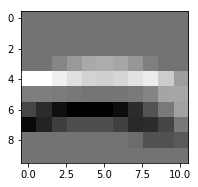

In [26]:
plot(corrtop[dims])

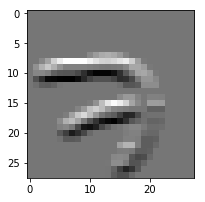

In [27]:
plot(corrtop)

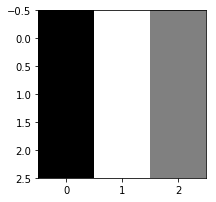

In [30]:
### an other filter
np.rot90(top, 1)
plot(np.rot90(top, 1))

False

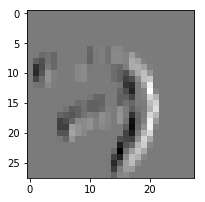

In [31]:
### apply and plot
convtop = convolve(images[0], np.rot90(top,1))
plot(convtop)
np.allclose(convtop, corrtop)

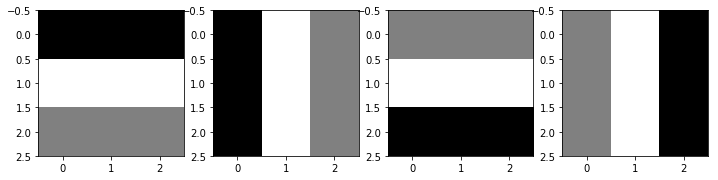

In [32]:
### generate linear filter
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

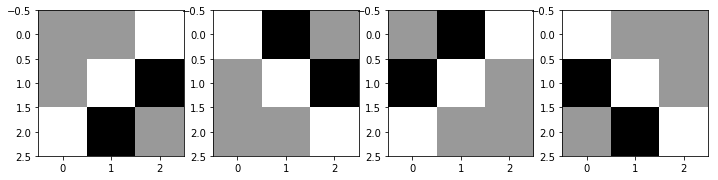

In [33]:
### generate oblique filter
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

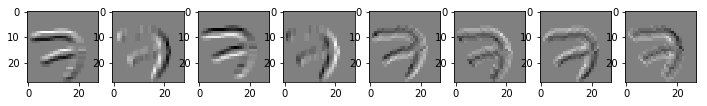

In [35]:
### apply linear + oblique filters and plot
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

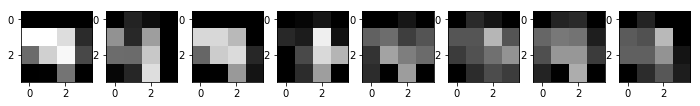

In [37]:
### pooling filtered images
def pool(im): return block_reduce(im, (7,7), np.max)

plots([pool(im) for im in corrs])

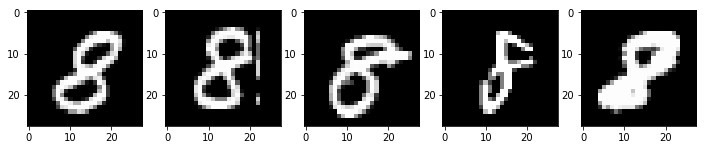

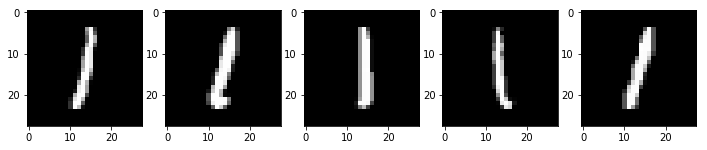

In [40]:
### extract 8 and 1 samples and plot
eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

plots(eights[:5])
plots(ones[:5])

In [41]:
### apply linear + oblique filters over 8 samples and plot
### get a kind of finger print of 8
pool8 = [np.array([pool(correlate(im, rot)) for im in eights]) for rot in rots]

In [42]:
len(pool8), pool8[0].shape

(8, (5389, 4, 4))

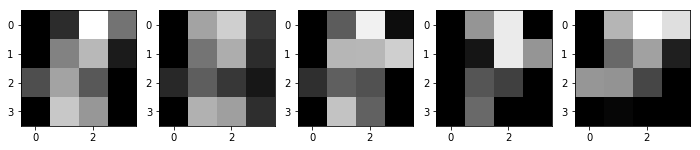

In [43]:
plots(pool8[0][0:5])

In [44]:
def normalize(arr): return (arr-arr.mean())/arr.std()

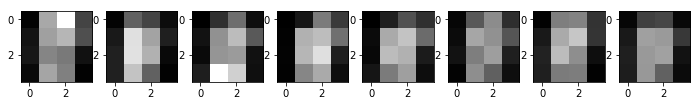

In [47]:
### normalize filtered+pooled samples + plot
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

plots(filts8)

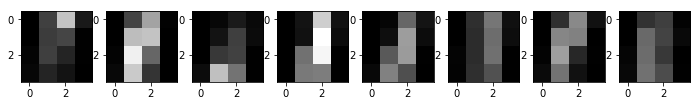

In [48]:
pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

plots(filts1)

In [49]:
def pool_corr(im): return np.array([pool(correlate(im, rot)) for rot in rots])

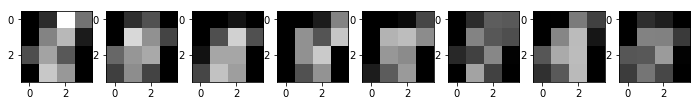

In [50]:
### 
plots(pool_corr(eights[0]))

In [51]:
def sse(a,b): return ((a-b)**2).sum()
def is8_n2(im): return 1 if sse(pool_corr(im),filts1) > sse(pool_corr(im),filts8) else 0

In [52]:
### compute standard squarred errors
sse(pool_corr(eights[0]), filts8), sse(pool_corr(eights[0]), filts1)

(126.77776, 181.26105)

In [53]:
### predict if samples are 8 samples
[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

[5223, 287]

In [54]:
### predict if samples are not 8 samples
[np.array([(1-is8_n2(im)) for im in ims]).sum() for ims in [eights,ones]]

[166, 5892]

In [55]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is8_n1(im): return 1 if n1(pool_corr(im),filts1) > n1(pool_corr(im),filts8) else 0

In [56]:
[np.array([is8_n1(im) for im in ims]).sum() for ims in [eights,ones]]

[5129, 254]

In [57]:
[np.array([(1-is8_n1(im)) for im in ims]).sum() for ims in [eights,ones]]

[260, 5925]